NVIDIA GeForce RTX 3080
Memory Usage:
Allocated: 0.1 GB
Cached:    0.1 GB


C:\Users\Aria\AppData\Local\Temp\ipykernel_125880\3487302210.py:161: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


Files already downloaded and verified
Files already downloaded and verified


Using cache found in C:\Users\Aria/.cache\torch\hub\pytorch_vision_v0.6.0


[1,  1000] loss: 2.748, Ça coûte 8.296
[1,  2000] loss: 1.964, Ça coûte 38.301
[1,  3000] loss: 1.807, Ça coûte 38.648
[1,  4000] loss: 1.696, Ça coûte 38.782
[1,  5000] loss: 1.639, Ça coûte 38.198
[1,  6000] loss: 1.566, Ça coûte 38.676
[2,  1000] loss: 1.513, Ça coûte 7.774
[2,  2000] loss: 1.474, Ça coûte 38.392
[2,  3000] loss: 1.419, Ça coûte 38.550
[2,  4000] loss: 1.394, Ça coûte 38.271
[2,  5000] loss: 1.357, Ça coûte 38.312
[2,  6000] loss: 1.347, Ça coûte 38.291
[3,  1000] loss: 1.268, Ça coûte 7.721
[3,  2000] loss: 1.233, Ça coûte 38.225
[3,  3000] loss: 1.251, Ça coûte 38.514
[3,  4000] loss: 1.207, Ça coûte 38.458
[3,  5000] loss: 1.199, Ça coûte 38.034
[3,  6000] loss: 1.221, Ça coûte 38.457
[4,  1000] loss: 1.140, Ça coûte 7.678
[4,  2000] loss: 1.145, Ça coûte 38.136
[4,  3000] loss: 1.117, Ça coûte 38.347
[4,  4000] loss: 1.123, Ça coûte 38.381
[4,  5000] loss: 1.095, Ça coûte 38.249
[4,  6000] loss: 1.112, Ça coûte 38.482
[5,  1000] loss: 1.044, Ça coûte 7.730
[5,  

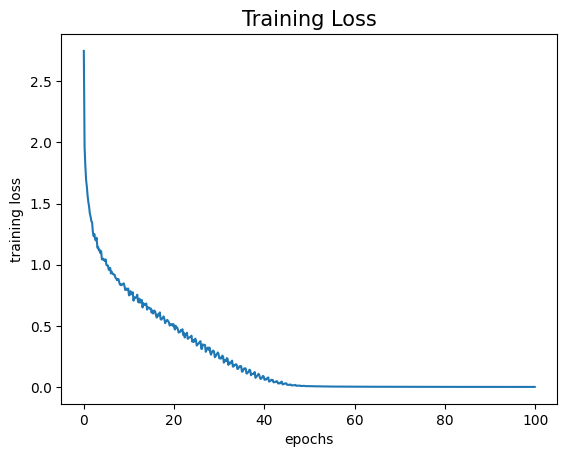

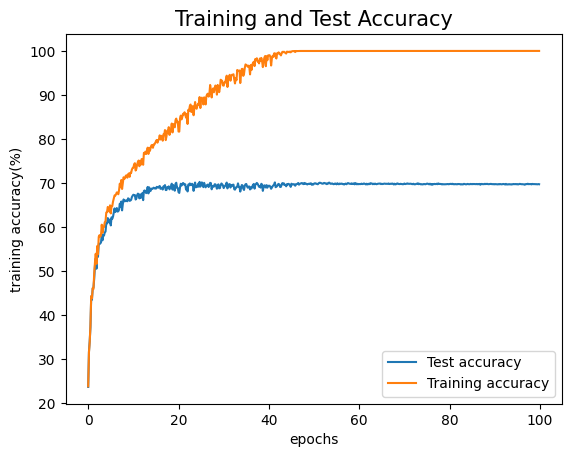

In [ ]:
"""
Batch size: 8
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_some_pictures(j ):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(j)))


def random_test():
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    net = Net()
    net.load_state_dict(torch.load(PATH))
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

def train(net, noe, filepath_trainloss, filepath_testacc, filepath_trainacc, initial_lr,  batchsize, device):
    doc = open(filepath_trainloss+'.txt', "w")
    doc2 = open(filepath_testacc+'.txt', "w")
    doc3 = open(filepath_trainacc+'.txt', "w")
    check_interval=1000
    batch_number = int(6000*8/(batchsize*check_interval))
    #print(batch_number)
    training_loss_vec = [] #np.zeros(noe*check_interval)
    train_acc_vec = [] #np.zeros(noe*check_interval)
    test_acc_vec = [] #np.zeros(noe*check_interval)
    for epoch in range(noe):  # loop over the dataset multiple times
        time_begin  = time.time()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % check_interval == (check_interval-1):    # print every 2000 mini-batches
                time_end = time.time()
                time_elapsed = time_end - time_begin
                time_begin = time.time()
                print('[%d, %5d] loss: %.3f, Ça coûte %.3f' %
                      (epoch + 1, i + 1, running_loss / check_interval, time_elapsed))
                training_loss_vec.append(running_loss/check_interval)
                train_acc = train_accuracy(net)
                train_acc_vec.append(train_acc)
                test_acc = test_accuracy(net)
                test_acc_vec.append(test_acc)
                print(running_loss / check_interval, file=doc)
                print(test_acc, file=doc2)
                print(train_acc, file=doc3)
                running_loss = 0.0
        if epoch % 1 == 0:
            for p in optimizer.param_groups:
                p['lr'] = initial_lr/np.sqrt(1+epoch)
    doc.close()
    doc2.close()

    xvar=np.arange(noe*batch_number)/batch_number
    #plt.subplot(122)
    plt.figure(1)
    plt.title("Training Loss", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training loss')
    plt.plot(xvar, np.array(training_loss_vec))
    plt.savefig(filepath_trainloss+'.png')

    #plt.subplot(122)
    plt.figure(2)
    plt.title("Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('test accuracy(%)')
    plt.plot(xvar, np.array(test_acc_vec), label="Test accuracy")
    plt.legend()
    plt.savefig(filepath_testacc + '.png')
    
    #plt.subplot(122)
    plt.figure(2)
    plt.title("Training and Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training accuracy(%)')
    plt.plot(xvar, np.array(train_acc_vec), label="Training accuracy")
    plt.legend()
    plt.savefig(filepath_trainacc + '.png')

def train_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def test_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

batchsize=8
# data sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize,
                                          shuffle=True, num_workers=1, pin_memory=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=1, pin_memory=True)

beta_1 = 0
beta_2 = 1

# resnet
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=False)
net.eval()

net = net.to(device, non_blocking=True)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(beta_1, beta_2), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=beta_1, dampening=0, weight_decay=0, nesterov=False)
train(net, 100, "Exp1-training-loss-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-test-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-train-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), 0.001, batchsize, device)
print('Finished Training')
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


NVIDIA GeForce RTX 3080
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


C:\Users\Aria\AppData\Local\Temp\ipykernel_151304\3883875889.py:161: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


Files already downloaded and verified
Files already downloaded and verified


Using cache found in C:\Users\Aria/.cache\torch\hub\pytorch_vision_v0.6.0
c:\Users\Aria\Desktop\CS536FinalProject\CS536_FinalProject\gpu_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Aria\Desktop\CS536FinalProject\CS536_FinalProject\gpu_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


[1,  1000] loss: 2.592, Ça coûte 12.040
[1,  2000] loss: 1.928, Ça coûte 26.402
[1,  3000] loss: 1.741, Ça coûte 25.920
[2,  1000] loss: 1.625, Ça coûte 10.902
[2,  2000] loss: 1.545, Ça coûte 25.747
[2,  3000] loss: 1.484, Ça coûte 25.472
[3,  1000] loss: 1.411, Ça coûte 10.525
[3,  2000] loss: 1.369, Ça coûte 25.227
[3,  3000] loss: 1.352, Ça coûte 25.334
[4,  1000] loss: 1.296, Ça coûte 10.937
[4,  2000] loss: 1.275, Ça coûte 25.985
[4,  3000] loss: 1.267, Ça coûte 26.279
[5,  1000] loss: 1.220, Ça coûte 11.089
[5,  2000] loss: 1.206, Ça coûte 26.129
[5,  3000] loss: 1.182, Ça coûte 25.547
[6,  1000] loss: 1.157, Ça coûte 10.250
[6,  2000] loss: 1.135, Ça coûte 24.851
[6,  3000] loss: 1.137, Ça coûte 24.542
[7,  1000] loss: 1.103, Ça coûte 10.153
[7,  2000] loss: 1.108, Ça coûte 24.826
[7,  3000] loss: 1.079, Ça coûte 24.622
[8,  1000] loss: 1.052, Ça coûte 11.148
[8,  2000] loss: 1.064, Ça coûte 26.060
[8,  3000] loss: 1.048, Ça coûte 26.198
[9,  1000] loss: 1.020, Ça coûte 10.906


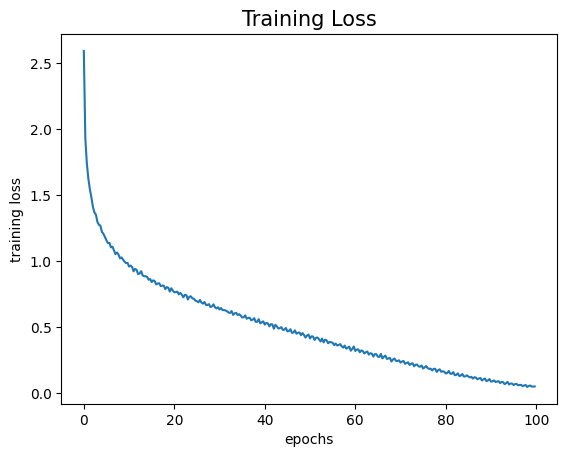

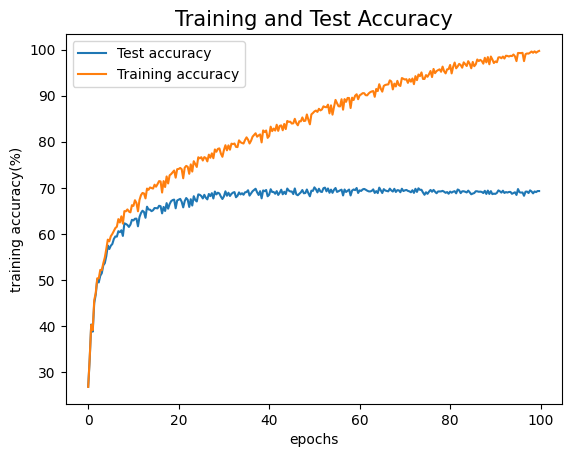

In [1]:
"""
Batch size: 16
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_some_pictures(j ):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(j)))


def random_test():
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    net = Net()
    net.load_state_dict(torch.load(PATH))
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

def train(net, noe, filepath_trainloss, filepath_testacc, filepath_trainacc, initial_lr,  batchsize, device):
    doc = open(filepath_trainloss+'.txt', "w")
    doc2 = open(filepath_testacc+'.txt', "w")
    doc3 = open(filepath_trainacc+'.txt', "w")
    check_interval=1000
    batch_number = int(6000*8/(batchsize*check_interval))
    #print(batch_number)
    training_loss_vec = [] #np.zeros(noe*check_interval)
    train_acc_vec = [] #np.zeros(noe*check_interval)
    test_acc_vec = [] #np.zeros(noe*check_interval)
    for epoch in range(noe):  # loop over the dataset multiple times
        time_begin  = time.time()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % check_interval == (check_interval-1):    # print every 2000 mini-batches
                time_end = time.time()
                time_elapsed = time_end - time_begin
                time_begin = time.time()
                print('[%d, %5d] loss: %.3f, Ça coûte %.3f' %
                      (epoch + 1, i + 1, running_loss / check_interval, time_elapsed))
                training_loss_vec.append(running_loss/check_interval)
                train_acc = train_accuracy(net)
                train_acc_vec.append(train_acc)
                test_acc = test_accuracy(net)
                test_acc_vec.append(test_acc)
                print(running_loss / check_interval, file=doc)
                print(test_acc, file=doc2)
                print(train_acc, file=doc3)
                running_loss = 0.0
        if epoch % 1 == 0:
            for p in optimizer.param_groups:
                p['lr'] = initial_lr/np.sqrt(1+epoch)
    doc.close()
    doc2.close()

    xvar=np.arange(noe*batch_number)/batch_number
    #plt.subplot(122)
    plt.figure(1)
    plt.title("Training Loss", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training loss')
    plt.plot(xvar, np.array(training_loss_vec))
    plt.savefig(filepath_trainloss+'.png')

    #plt.subplot(122)
    plt.figure(2)
    plt.title("Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('test accuracy(%)')
    plt.plot(xvar, np.array(test_acc_vec), label="Test accuracy")
    plt.legend()
    plt.savefig(filepath_testacc + '.png')
    
    #plt.subplot(122)
    plt.figure(2)
    plt.title("Training and Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training accuracy(%)')
    plt.plot(xvar, np.array(train_acc_vec), label="Training accuracy")
    plt.legend()
    plt.savefig(filepath_trainacc + '.png')

def train_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def test_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

batchsize=16
# data sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize,
                                          shuffle=True, num_workers=1, pin_memory=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=1, pin_memory=True)

beta_1 = 0
beta_2 = 1

# resnet
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=False)
net.eval()

net = net.to(device, non_blocking=True)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(beta_1, beta_2), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=beta_1, dampening=0, weight_decay=0, nesterov=False)
train(net, 100, "Exp1-training-loss-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-test-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-train-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), 0.001, batchsize, device)
print('Finished Training')
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


NVIDIA GeForce RTX 3080
Memory Usage:
Allocated: 0.1 GB
Cached:    0.1 GB


C:\Users\Aria\AppData\Local\Temp\ipykernel_151304\563576036.py:161: FutureWarning: `torch.cuda.memory_cached` has been renamed to `torch.cuda.memory_reserved`
  print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')


Files already downloaded and verified
Files already downloaded and verified


Using cache found in C:\Users\Aria/.cache\torch\hub\pytorch_vision_v0.6.0


[1,  1000] loss: 2.654, Ça coûte 11.263
[2,  1000] loss: 1.738, Ça coûte 11.329
[3,  1000] loss: 1.574, Ça coûte 11.297
[4,  1000] loss: 1.498, Ça coûte 11.479
[5,  1000] loss: 1.442, Ça coûte 11.338
[6,  1000] loss: 1.392, Ça coûte 11.208
[7,  1000] loss: 1.352, Ça coûte 11.303
[8,  1000] loss: 1.319, Ça coûte 11.180
[9,  1000] loss: 1.284, Ça coûte 10.986
[10,  1000] loss: 1.257, Ça coûte 10.977
[11,  1000] loss: 1.230, Ça coûte 11.105
[12,  1000] loss: 1.206, Ça coûte 11.332
[13,  1000] loss: 1.191, Ça coûte 11.385
[14,  1000] loss: 1.166, Ça coûte 11.369
[15,  1000] loss: 1.151, Ça coûte 11.329
[16,  1000] loss: 1.134, Ça coûte 11.527
[17,  1000] loss: 1.116, Ça coûte 11.332
[18,  1000] loss: 1.104, Ça coûte 11.251
[19,  1000] loss: 1.090, Ça coûte 11.229
[20,  1000] loss: 1.075, Ça coûte 11.100
[21,  1000] loss: 1.061, Ça coûte 11.107
[22,  1000] loss: 1.048, Ça coûte 11.133
[23,  1000] loss: 1.037, Ça coûte 11.198
[24,  1000] loss: 1.022, Ça coûte 11.017
[25,  1000] loss: 1.020, 

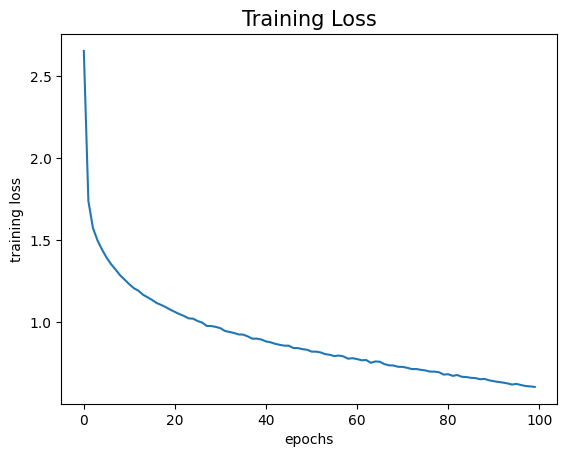

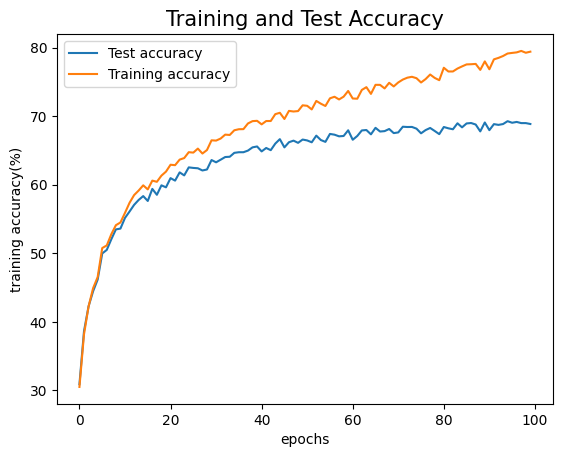

In [2]:
"""
Batch size: 32
"""
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import matplotlib.pyplot as plt

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

def show_some_pictures(j ):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = dataiter.next()

    # show images
    imshow(torchvision.utils.make_grid(images))
    # print labels
    print(' '.join('%5s' % classes[labels[j]] for j in range(j)))


def random_test():
    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
    imshow(torchvision.utils.make_grid(images))
    print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

    net = Net()
    net.load_state_dict(torch.load(PATH))
    outputs = net(images)

    _, predicted = torch.max(outputs, 1)

    print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                                  for j in range(4)))

def train(net, noe, filepath_trainloss, filepath_testacc, filepath_trainacc, initial_lr,  batchsize, device):
    doc = open(filepath_trainloss+'.txt', "w")
    doc2 = open(filepath_testacc+'.txt', "w")
    doc3 = open(filepath_trainacc+'.txt', "w")
    check_interval=1000
    batch_number = int(6000*8/(batchsize*check_interval))
    #print(batch_number)
    training_loss_vec = [] #np.zeros(noe*check_interval)
    train_acc_vec = [] #np.zeros(noe*check_interval)
    test_acc_vec = [] #np.zeros(noe*check_interval)
    for epoch in range(noe):  # loop over the dataset multiple times
        time_begin  = time.time()
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            if i % check_interval == (check_interval-1):    # print every 2000 mini-batches
                time_end = time.time()
                time_elapsed = time_end - time_begin
                time_begin = time.time()
                print('[%d, %5d] loss: %.3f, Ça coûte %.3f' %
                      (epoch + 1, i + 1, running_loss / check_interval, time_elapsed))
                training_loss_vec.append(running_loss/check_interval)
                train_acc = train_accuracy(net)
                train_acc_vec.append(train_acc)
                test_acc = test_accuracy(net)
                test_acc_vec.append(test_acc)
                print(running_loss / check_interval, file=doc)
                print(test_acc, file=doc2)
                print(train_acc, file=doc3)
                running_loss = 0.0
        if epoch % 1 == 0:
            for p in optimizer.param_groups:
                p['lr'] = initial_lr/np.sqrt(1+epoch)
    doc.close()
    doc2.close()

    xvar=np.arange(noe*batch_number)/batch_number
    #plt.subplot(122)
    plt.figure(1)
    plt.title("Training Loss", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training loss')
    plt.plot(xvar, np.array(training_loss_vec))
    plt.savefig(filepath_trainloss+'.png')

    #plt.subplot(122)
    plt.figure(2)
    plt.title("Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('test accuracy(%)')
    plt.plot(xvar, np.array(test_acc_vec), label="Test accuracy")
    plt.legend()
    plt.savefig(filepath_testacc + '.png')
    
    #plt.subplot(122)
    plt.figure(2)
    plt.title("Training and Test Accuracy", fontsize=15)
    plt.xlabel('epochs')
    plt.ylabel('training accuracy(%)')
    plt.plot(xvar, np.array(train_acc_vec), label="Training accuracy")
    plt.legend()
    plt.savefig(filepath_trainacc + '.png')

def train_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

def test_accuracy(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device, non_blocking=True), data[1].to(device, non_blocking=True)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#device = torch.device("cpu")
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

batchsize=32
# data sets
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize,
                                          shuffle=True, num_workers=1, pin_memory=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize,
                                         shuffle=False, num_workers=1, pin_memory=True)

beta_1 = 0
beta_2 = 1

# resnet
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=False)
net.eval()

net = net.to(device, non_blocking=True)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(beta_1, beta_2), eps=1e-08, weight_decay=0, amsgrad=False)
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=beta_1, dampening=0, weight_decay=0, nesterov=False)
train(net, 100, "Exp1-training-loss-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-test-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), "Exp1-train-accuracy-beta1="+str(beta_1)+";bs="+str(batchsize), 0.001, batchsize, device)
print('Finished Training')
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)
